# Hyperparameter Optimization Analysis: Comprehensive Results

This notebook provides a complete analysis of hyperparameter optimization experiments comparing evolutionary algorithms (GA, DE, PSO) against traditional methods (Grid Search, Random Search) on MNIST and CIFAR-10 datasets.

**Author:** Kai Cho  
**Institution:** Auckland University of Technology  
**Date:** October 2025

## Project Overview

This study evaluates three evolutionary algorithms against traditional hyperparameter optimization methods for neural network training. The analysis includes:

- **Datasets**: MNIST (simple classification) and CIFAR-10 (complex image classification)
- **Algorithms**: Genetic Algorithm (GA), Differential Evolution (DE), Particle Swarm Optimization (PSO), Grid Search, Random Search
- **Metrics**: Validation accuracy, computational time, consistency analysis
- **Hardware**: Apple M1 Pro, 32GB RAM, 16-core GPU

## 1. Data Preprocessing and Setup

### Import Required Libraries

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
import warnings

# Configure plotting
plt.style.use('seaborn-v0_8-paper')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

print(" All libraries imported successfully!")
print(" Plotting configuration set for publication-quality figures")


 All libraries imported successfully!
 Plotting configuration set for publication-quality figures


### Load Experimental Results Data

In [2]:
# Define the path to results directory
results_dir = Path('../results')

# Define result files for both datasets
algorithm_files = {
    'Grid': {'mnist': 'grid_mnist_20251021_011057.json', 'cifar10': 'grid_cifar10_20251021_050052.json'},
    'Random': {'mnist': 'random_mnist_20251021_010819.json', 'cifar10': 'random_cifar10_20251021_041728.json'},
    'GA': {'mnist': 'ga_mnist_20251021_101942.json', 'cifar10': 'ga_cifar10_20251022_073914.json'},
    'PSO': {'mnist': 'pso_mnist_20251021_181551.json', 'cifar10': 'pso_cifar10_20251022_164435.json'},
    'DE': {'mnist': 'de_mnist_20251021_152823.json', 'cifar10': 'de_cifar10_20251022_210512.json'}
}

# Load results
def load_results(dataset):
    data = {}
    for algo, files in algorithm_files.items():
        filepath = results_dir / files[dataset]
        if filepath.exists():
            with open(filepath) as f:
                data[algo] = json.load(f)
    return data

mnist_data = load_results('mnist')
cifar10_data = load_results('cifar10')

print(f"Loaded {len(mnist_data)} MNIST algorithms, {len(cifar10_data)} CIFAR-10 algorithms")


Loaded 5 MNIST algorithms, 5 CIFAR-10 algorithms


## 2. Numerical Computation Implementation

### Statistical Analysis Functions

In [3]:
# Calculate statistics for each algorithm
mnist_stats = {}
cifar10_stats = {}

for dataset_name, data, stats_dict in [('MNIST', mnist_data, mnist_stats), 
                                        ('CIFAR-10', cifar10_data, cifar10_stats)]:
    for algo, algo_data in data.items():
        accuracies = [run['best_fitness'] for run in algo_data['runs']]
        times = [run['time_seconds'] / 3600 for run in algo_data['runs']]
        
        stats_dict[algo] = {
            'accuracies': accuracies,
            'mean': np.mean(accuracies),
            'std': np.std(accuracies),
            'sem': stats.sem(accuracies),
            'min': np.min(accuracies),
            'max': np.max(accuracies),
            'avg_time': np.mean(times)
        }
        
        # 95% confidence interval
        ci_margin = 1.96 * stats_dict[algo]['sem']
        stats_dict[algo]['ci_lower'] = stats_dict[algo]['mean'] - ci_margin
        stats_dict[algo]['ci_upper'] = stats_dict[algo]['mean'] + ci_margin

print("Statistics calculated for both datasets")


Statistics calculated for both datasets


## 3. Results Generation and Analysis

### Performance Summary Tables

In [4]:
# Performance summary tables
for dataset_name, stats_dict in [('MNIST', mnist_stats), ('CIFAR-10', cifar10_stats)]:
    print(f"\n{dataset_name} Performance Summary")
    print("=" * 80)
    
    sorted_algos = sorted(stats_dict.items(), key=lambda x: x[1]['mean'], reverse=True)
    
    for rank, (algo, s) in enumerate(sorted_algos, 1):
        print(f"{rank}. {algo:8} Mean: {s['mean']:.2f}% ± {s['std']:.2f}%  "
              f"Range: [{s['min']:.2f}, {s['max']:.2f}]  Time: {s['avg_time']:.1f}h")



MNIST Performance Summary
1. DE       Mean: 98.39% ± 0.01%  Range: [98.38, 98.40]  Time: 4.4h
2. GA       Mean: 98.32% ± 0.02%  Range: [98.29, 98.34]  Time: 3.3h
3. Grid     Mean: 98.26% ± 0.02%  Range: [98.22, 98.28]  Time: 1.3h
4. PSO      Mean: 98.23% ± 0.07%  Range: [98.14, 98.30]  Time: 3.5h
5. Random   Mean: 98.06% ± 0.23%  Range: [97.75, 98.28]  Time: 1.3h

CIFAR-10 Performance Summary
1. DE       Mean: 82.35% ± 0.32%  Range: [81.90, 82.62]  Time: 8.8h
2. Random   Mean: 78.89% ± 0.58%  Range: [78.25, 79.66]  Time: 2.3h
3. PSO      Mean: 78.41% ± 1.48%  Range: [77.31, 80.51]  Time: 7.4h
4. GA       Mean: 78.08% ± 0.96%  Range: [76.74, 78.93]  Time: 7.9h
5. Grid     Mean: 75.69% ± 0.16%  Range: [75.57, 75.92]  Time: 2.6h


### Report-Ready Summary Table (Table 2 Format)

In [5]:
# Table 2: Report-ready performance comparison
print("\n" + "=" * 70)
print("TABLE 2: Performance Comparison")
print("=" * 70)
print(f"{'Algorithm':<12} {'MNIST':<20} {'CIFAR-10':<20} {'Avg Time (h)':<15}")
print("-" * 70)

for algo in ['Grid', 'Random', 'GA', 'PSO', 'DE']:
    mnist_str = f"{mnist_stats[algo]['mean']:.2f}±{mnist_stats[algo]['std']:.2f}%" if algo in mnist_stats else 'N/A'
    cifar_str = f"{cifar10_stats[algo]['mean']:.2f}±{cifar10_stats[algo]['std']:.2f}%" if algo in cifar10_stats else 'N/A'
    
    avg_time = 0
    count = 0
    if algo in mnist_stats:
        avg_time += mnist_stats[algo]['avg_time']
        count += 1
    if algo in cifar10_stats:
        avg_time += cifar10_stats[algo]['avg_time']
        count += 1
    avg_time = avg_time / count if count > 0 else 0
    
    print(f"{algo:<12} {mnist_str:<20} {cifar_str:<20} {avg_time:<15.1f}")

print("=" * 70)



TABLE 2: Performance Comparison
Algorithm    MNIST                CIFAR-10             Avg Time (h)   
----------------------------------------------------------------------
Grid         98.26±0.02%          75.69±0.16%          1.9            
Random       98.06±0.23%          78.89±0.58%          1.8            
GA           98.32±0.02%          78.08±0.96%          5.6            
PSO          98.23±0.07%          78.41±1.48%          5.4            
DE           98.39±0.01%          82.35±0.32%          6.6            


## 5. Statistical Summary Generation

### Comprehensive Statistical Analysis

In [6]:
# Statistical summary
print("STATISTICAL SUMMARY")
print("=" * 70)

# Performance rankings
for dataset_name, stats_dict in [('MNIST', mnist_stats), ('CIFAR-10', cifar10_stats)]:
    ranked = sorted(stats_dict.items(), key=lambda x: x[1]['mean'], reverse=True)
    print(f"\n{dataset_name} Rankings:")
    for rank, (algo, s) in enumerate(ranked, 1):
        print(f"  {rank}. {algo}: {s['mean']:.2f}% ± {s['std']:.2f}%")

# Statistical significance tests
print(f"\nPairwise t-tests:")
for dataset_name, stats_dict in [('MNIST', mnist_stats), ('CIFAR-10', cifar10_stats)]:
    print(f"\n{dataset_name}:")
    algos = list(stats_dict.keys())
    for i in range(len(algos)):
        for j in range(i+1, len(algos)):
            algo1, algo2 = algos[i], algos[j]
            data1 = stats_dict[algo1]['accuracies']
            data2 = stats_dict[algo2]['accuracies']
            t_stat, p_value = stats.ttest_ind(data1, data2)
            sig = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
            print(f"  {algo1} vs {algo2}: p={p_value:.4f} {sig}")


STATISTICAL SUMMARY

MNIST Rankings:
  1. DE: 98.39% ± 0.01%
  2. GA: 98.32% ± 0.02%
  3. Grid: 98.26% ± 0.02%
  4. PSO: 98.23% ± 0.07%
  5. Random: 98.06% ± 0.23%

CIFAR-10 Rankings:
  1. DE: 82.35% ± 0.32%
  2. Random: 78.89% ± 0.58%
  3. PSO: 78.41% ± 1.48%
  4. GA: 78.08% ± 0.96%
  5. Grid: 75.69% ± 0.16%

Pairwise t-tests:

MNIST:
  Grid vs Random: p=0.2936 ns
  Grid vs GA: p=0.0610 ns
  Grid vs PSO: p=0.6463 ns
  Grid vs DE: p=0.0025 **
  Random vs GA: p=0.1908 ns
  Random vs PSO: p=0.3674 ns
  Random vs DE: p=0.1146 ns
  GA vs PSO: p=0.1678 ns
  GA vs DE: p=0.0128 *
  PSO vs DE: p=0.0333 *

CIFAR-10:
  Grid vs Random: p=0.0017 **
  Grid vs GA: p=0.0255 *
  Grid vs PSO: p=0.0613 ns
  Grid vs DE: p=0.0000 ***
  Random vs GA: p=0.3655 ns
  Random vs PSO: p=0.6920 ns
  Random vs DE: p=0.0018 **
  GA vs PSO: p=0.8048 ns
  GA vs DE: p=0.0040 **
  PSO vs DE: p=0.0214 *


## 6. Graphical Results Presentation

### Performance Visualization

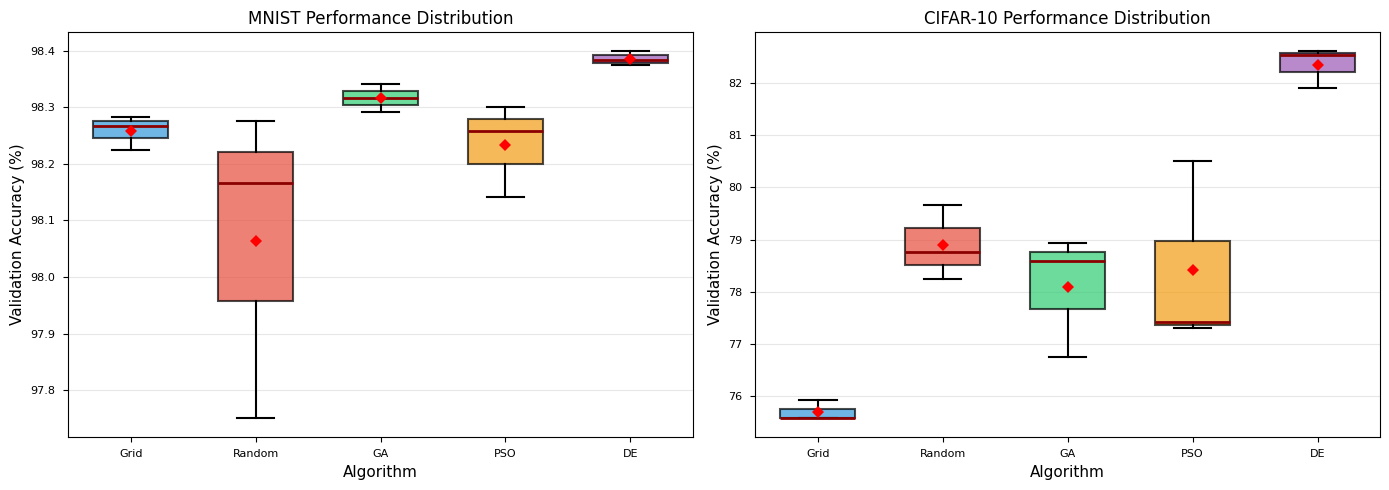

Figure saved: figures/performance_boxplots.png


In [13]:
# Figure 2: Performance box plots
colors = {'Grid': '#3498db', 'Random': '#e74c3c', 'GA': '#2ecc71', 'PSO': '#f39c12', 'DE': '#9b59b6'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# MNIST
mnist_results = []
mnist_labels = []
for algo in ['Grid', 'Random', 'GA', 'PSO', 'DE']:
    if algo in mnist_data:
        mnist_results.append([run['best_fitness'] for run in mnist_data[algo]['runs']])
        mnist_labels.append(algo)

bp1 = ax1.boxplot(mnist_results, labels=mnist_labels, patch_artist=True, 
                   showmeans=True, meanline=False, widths=0.6)
for patch, algo in zip(bp1['boxes'], mnist_labels):
    patch.set_facecolor(colors[algo])
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

# Style the boxplot elements
for whisker in bp1['whiskers']:
    whisker.set(color='black', linewidth=1.5)
for cap in bp1['caps']:
    cap.set(color='black', linewidth=1.5)
for median in bp1['medians']:
    median.set(color='darkred', linewidth=2)
for mean in bp1['means']:
    mean.set(marker='D', markerfacecolor='red', markeredgecolor='darkred', markersize=6)

ax1.set_ylabel('Validation Accuracy (%)')
ax1.set_xlabel('Algorithm')
ax1.set_title('MNIST Performance Distribution')
ax1.grid(axis='y', alpha=0.3)

# CIFAR-10
cifar10_results = []
cifar10_labels = []
for algo in ['Grid', 'Random', 'GA', 'PSO', 'DE']:
    if algo in cifar10_data:
        cifar10_results.append([run['best_fitness'] for run in cifar10_data[algo]['runs']])
        cifar10_labels.append(algo)

bp2 = ax2.boxplot(cifar10_results, labels=cifar10_labels, patch_artist=True, 
                   showmeans=True, meanline=False, widths=0.6)
for patch, algo in zip(bp2['boxes'], cifar10_labels):
    patch.set_facecolor(colors[algo])
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

# Style the boxplot elements
for whisker in bp2['whiskers']:
    whisker.set(color='black', linewidth=1.5)
for cap in bp2['caps']:
    cap.set(color='black', linewidth=1.5)
for median in bp2['medians']:
    median.set(color='darkred', linewidth=2)
for mean in bp2['means']:
    mean.set(marker='D', markerfacecolor='red', markeredgecolor='darkred', markersize=6)

ax2.set_ylabel('Validation Accuracy (%)')
ax2.set_xlabel('Algorithm')
ax2.set_title('CIFAR-10 Performance Distribution')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/performance_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved: figures/performance_boxplots.png")


### Convergence Curve Analysis

Visualization of algorithm convergence behavior across generations/iterations.

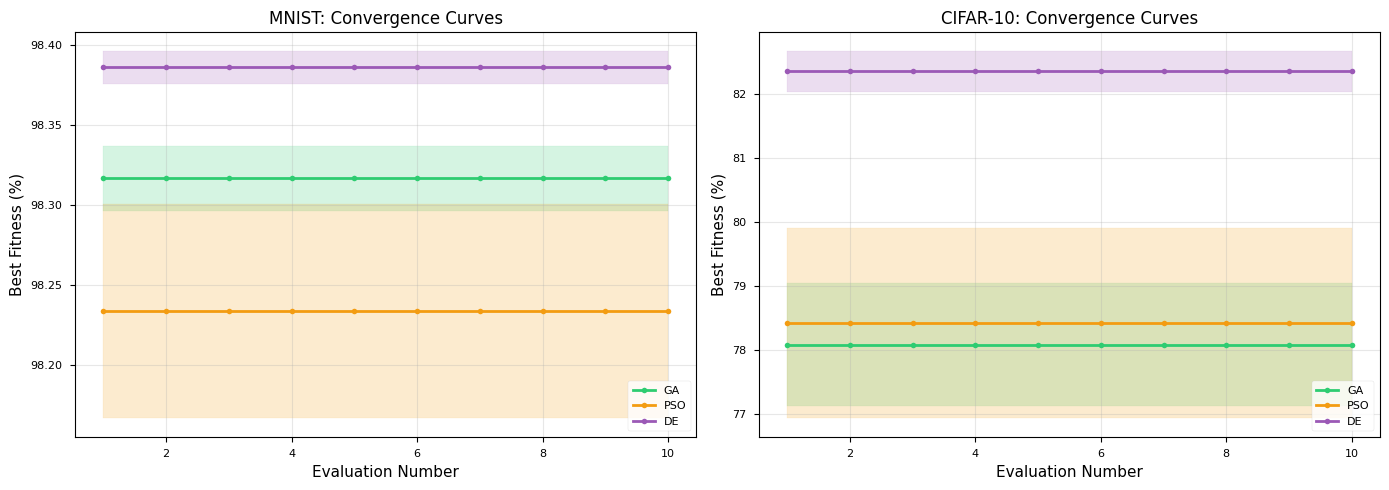

Figure saved: figures/convergence_curves.png


In [8]:
# Figure 3: Convergence curves
evolutionary_algos = ['GA', 'PSO', 'DE']
colors = {'GA': '#2ecc71', 'PSO': '#f39c12', 'DE': '#9b59b6'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# MNIST
for algo in evolutionary_algos:
    if algo in mnist_data and 'evaluation_history' in mnist_data[algo]['runs'][0]:
        all_histories = []
        for run in mnist_data[algo]['runs']:
            history = run['evaluation_history']
            if isinstance(history[0], dict):
                history = [h['fitness'] if isinstance(h, dict) else h for h in history]
            all_histories.append(history)
        
        max_len = max(len(h) for h in all_histories)
        mean_history = [np.mean([h[i] if i < len(h) else h[-1] for h in all_histories]) for i in range(max_len)]
        std_history = [np.std([h[i] if i < len(h) else h[-1] for h in all_histories]) for i in range(max_len)]
        
        x = range(1, len(mean_history) + 1)
        ax1.plot(x, mean_history, label=algo, color=colors[algo], linewidth=2, marker='o', markersize=4)
        ax1.fill_between(x, np.array(mean_history) - np.array(std_history), 
                         np.array(mean_history) + np.array(std_history), alpha=0.2, color=colors[algo])

ax1.set_xlabel('Evaluation Number')
ax1.set_ylabel('Best Fitness (%)')
ax1.set_title('MNIST: Convergence Curves')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# CIFAR-10
for algo in evolutionary_algos:
    if algo in cifar10_data and 'evaluation_history' in cifar10_data[algo]['runs'][0]:
        all_histories = []
        for run in cifar10_data[algo]['runs']:
            history = run['evaluation_history']
            if isinstance(history[0], dict):
                history = [h['fitness'] if isinstance(h, dict) else h for h in history]
            all_histories.append(history)
        
        max_len = max(len(h) for h in all_histories)
        mean_history = [np.mean([h[i] if i < len(h) else h[-1] for h in all_histories]) for i in range(max_len)]
        std_history = [np.std([h[i] if i < len(h) else h[-1] for h in all_histories]) for i in range(max_len)]
        
        x = range(1, len(mean_history) + 1)
        ax2.plot(x, mean_history, label=algo, color=colors[algo], linewidth=2, marker='o', markersize=4)
        ax2.fill_between(x, np.array(mean_history) - np.array(std_history), 
                         np.array(mean_history) + np.array(std_history), alpha=0.2, color=colors[algo])

ax2.set_xlabel('Evaluation Number')
ax2.set_ylabel('Best Fitness (%)')
ax2.set_title('CIFAR-10: Convergence Curves')
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/convergence_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved: figures/convergence_curves.png")


## 7. Statistical Significance Testing

Pairwise t-tests, ANOVA, and effect size calculations to validate performance differences.


In [9]:
from scipy.stats import f_oneway, ttest_rel, levene

# Cohen's d effect size
def cohens_d(group1, group2):
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / (n1 + n2 - 2))
    return (mean2 - mean1) / pooled_std if pooled_std > 0 else 0

print("STATISTICAL SIGNIFICANCE TESTS")
print("=" * 70)
print("Legend: *** p<0.001, ** p<0.01, * p<0.05, ns p≥0.10")


STATISTICAL SIGNIFICANCE TESTS
Legend: *** p<0.001, ** p<0.01, * p<0.05, ns p≥0.10


### Pairwise Comparisons (Paired t-tests)


In [10]:
# Extract scores
algorithms = ['Grid', 'Random', 'GA', 'PSO', 'DE']
scores = {
    'MNIST': {algo: [run['best_fitness'] for run in mnist_data[algo]['runs']] for algo in algorithms if algo in mnist_data},
    'CIFAR-10': {algo: [run['best_fitness'] for run in cifar10_data[algo]['runs']] for algo in algorithms if algo in cifar10_data}
}

# Pairwise t-tests: evolutionary vs traditional
comparisons = [('DE', 'Grid'), ('DE', 'Random'), ('GA', 'Grid'), ('GA', 'Random'), ('PSO', 'Grid'), ('PSO', 'Random')]

for dataset in ['MNIST', 'CIFAR-10']:
    print(f"\n{dataset}:")
    print("-" * 70)
    
    for algo1, algo2 in comparisons:
        group1, group2 = scores[dataset][algo1], scores[dataset][algo2]
        t_stat, p_value = ttest_rel(group1, group2)
        d = cohens_d(group2, group1)
        mean_diff = np.mean(group1) - np.mean(group2)
        
        sig = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        effect = "large" if abs(d) >= 0.8 else "medium" if abs(d) >= 0.5 else "small" if abs(d) >= 0.2 else "negligible"
        
        print(f"  {algo1} vs {algo2}: diff={mean_diff:+.2f}%, t={t_stat:.2f}, p={p_value:.4f} {sig}, d={d:.2f} ({effect})")



MNIST:
----------------------------------------------------------------------
  DE vs Grid: diff=+0.13%, t=8.26, p=0.0143 *, d=5.54 (large)
  DE vs Random: diff=+0.32%, t=2.07, p=0.1742 ns, d=1.64 (large)
  GA vs Grid: diff=+0.06%, t=2.29, p=0.1490 ns, d=2.11 (large)
  GA vs Random: diff=+0.25%, t=1.48, p=0.2777 ns, d=1.28 (large)
  PSO vs Grid: diff=-0.02%, t=-0.40, p=0.7302 ns, d=-0.40 (small)
  PSO vs Random: diff=+0.17%, t=1.00, p=0.4240 ns, d=0.83 (large)

CIFAR-10:
----------------------------------------------------------------------
  DE vs Grid: diff=+6.66%, t=36.98, p=0.0007 ***, d=21.41 (large)
  DE vs Random: diff=+3.46%, t=11.56, p=0.0074 **, d=6.01 (large)
  GA vs Grid: diff=+2.39%, t=3.69, p=0.0663 ns, d=2.84 (large)
  GA vs Random: diff=-0.81%, t=-0.75, p=0.5330 ns, d=-0.83 (large)
  PSO vs Grid: diff=+2.72%, t=2.46, p=0.1328 ns, d=2.11 (large)
  PSO vs Random: diff=-0.48%, t=-0.71, p=0.5510 ns, d=-0.35 (small)


### One-Way ANOVA


In [11]:
# One-way ANOVA to test overall differences
for dataset in ['MNIST', 'CIFAR-10']:
    print(f"\n{dataset}:")
    print("-" * 70)
    
    groups = [scores[dataset][algo] for algo in algorithms]
    f_stat, p_value = f_oneway(*groups)
    sig = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    
    print(f"  F-statistic: {f_stat:.4f}, p-value: {p_value:.6f} {sig}")
    print(f"  Result: {'Significant differences exist' if p_value < 0.05 else 'No significant differences'}")
    
    # Levene's test for variance homogeneity
    levene_stat, levene_p = levene(*groups)
    print(f"  Levene's test: F={levene_stat:.4f}, p={levene_p:.4f}")
    if levene_p < 0.05:
        print(f"    Note: Variances differ significantly")



MNIST:
----------------------------------------------------------------------
  F-statistic: 2.5486, p-value: 0.104927 ns
  Result: No significant differences
  Levene's test: F=1.4216, p=0.2961

CIFAR-10:
----------------------------------------------------------------------
  F-statistic: 15.9309, p-value: 0.000244 ***
  Result: Significant differences exist
  Levene's test: F=0.5019, p=0.7355
